为实现字母与数字的识别，我更换了数据集。

也尝试更改了模型结构。

具体代码如下：



In [ ]:
import numpy as np
import pandas as pd
import struct
import random
import os
import tensorflow as tf
from tensorflow import keras
from pathlib import Path
import matplotlib.pyplot as plt
import gzip

labels = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'

# your path
# folder = str(os.fspath(Path(__file__).resolve().parent / "data"))
folder = "/content/drive/MyDrive/Handwriting.Keyboard/data"
def load_data(path):
    print("Getting data..")
    with gzip.open(path, 'rb') as f:
        z,dtype,dim = struct.unpack(">HBB",f.read(4))
        shape = tuple(struct.unpack(">I",f.read(4))[0] for d in range(dim))
        print(shape)
        return np.frombuffer(f.read(),dtype=np.uint8).reshape(shape)

def load_emnist():
    train_img = folder +'/emnist-byclass-train-images-idx3-ubyte.gz'
    train_lab = folder +'/emnist-byclass-train-labels-idx1-ubyte.gz'
    test_img = folder +'/emnist-byclass-test-images-idx3-ubyte.gz'
    test_lab = folder +'/emnist-byclass-test-labels-idx1-ubyte.gz'

    train_x = load_data(train_img)
    train_y = load_data(train_lab)
    test_x = load_data(test_img)
    test_y = load_data(test_lab)
    return train_x, train_y, test_x, test_y

train_x, train_y, test_x, test_y = load_emnist()
train_x = train_x.reshape(697932, 28, 28, 1)
train_x = train_x / 255.0
test_x = test_x/255.0

# plt.imshow(test_x[55].T,cmap = "gray")
# plt.colorbar()
# plt.show()

class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if logs.get('accuracy') is not None and logs.get('accuracy') > 0.99:
                print("\nReached 99% accuracy so cancelling training!") 
                self.model.stop_training = True


callbacks = myCallback()

model = tf.keras.models.Sequential([ 
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28,1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(input_shape=(28, 28,1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(labels), activation='softmax')
]) 
model.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy']) 

history = model.fit(train_x, train_y, epochs=40, callbacks=[callbacks])

model.save('my_model.h5')

model.evaluate(train_x, train_y)

    
# classes = model.predict(test_x[55], verbose = 1)

# print(classes[0])
# print(labels[int(classes[0])])
  
# plt.imshow(test_x[55].T,cmap = "gray")
# plt.colorbar()
# plt.show()



Getting data..
(697932, 28, 28)
Getting data..
(697932,)
Getting data..
(116323, 28, 28)
Getting data..
(116323,)
Epoch 1/40
21811/21811 [==============================] - 84s 3ms/step - loss: 0.4902 - accuracy: 0.8315
Epoch 2/40
21811/21811 [==============================] - 76s 3ms/step - loss: 0.3866 - accuracy: 0.8584
Epoch 3/40
21811/21811 [==============================] - 74s 3ms/step - loss: 0.3661 - accuracy: 0.8645
Epoch 4/40
21811/21811 [==============================] - 77s 4ms/step - loss: 0.3541 - accuracy: 0.8679
Epoch 5/40
21811/21811 [==============================] - 73s 3ms/step - loss: 0.3457 - accuracy: 0.8701
Epoch 6/40
21811/21811 [==============================] - 73s 3ms/step - loss: 0.3393 - accuracy: 0.8719
Epoch 7/40
21811/21811 [==============================] - 75s 3ms/step - loss: 0.3343 - accuracy: 0.8736
Epoch 8/40
21811/21811 [==============================] - 76s 3ms/step - loss: 0.3307 - accuracy: 0.8745
Epoch 9/40
21811/21811 [======================

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
!nvidia-smi

Sun Jan  8 16:50:40 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P0    28W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf
try:
    import tensorflow.python.keras as keras
except:
    import tensorflow.keras as keras
from tensorflow.python.keras import layers
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import struct
import random
import os
from pathlib import Path
import matplotlib.pyplot as plt
import gzip

labels = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'

# your path
# folder = str(os.fspath(Path(__file__).resolve().parent / "data"))
folder = "/content/drive/MyDrive/Handwriting.Keyboard/data"

def load_data(path):
    print("Getting data..")
    with gzip.open(path, 'rb') as f:
        z,dtype,dim = struct.unpack(">HBB",f.read(4))
        shape = tuple(struct.unpack(">I",f.read(4))[0] for d in range(dim))
        print(shape)
        return np.frombuffer(f.read(),dtype=np.uint8).reshape(shape)

def load_emnist():
    train_img = folder +'/emnist-byclass-train-images-idx3-ubyte.gz'
    train_lab = folder +'/emnist-byclass-train-labels-idx1-ubyte.gz'
    test_img = folder +'/emnist-byclass-test-images-idx3-ubyte.gz'
    test_lab = folder +'/emnist-byclass-test-labels-idx1-ubyte.gz'

    train_x = load_data(train_img)
    train_y = load_data(train_lab)
    test_x = load_data(test_img)
    test_y = load_data(test_lab)
    return train_x, train_y, test_x, test_y

train_x, train_y, test_x, test_y = load_emnist()

train_x = train_x.reshape(train_x.shape[0], 28, 28, 1).astype('float32')
test_x = test_x.reshape(test_x.shape[0], 28, 28, 1).astype('float32')

train_x = train_x / 255 # 归一化
test_x = test_x / 255

y_trainOnehot = to_categorical(train_y)
y_testOnehot = to_categorical(test_y)

train_x, X_val, train_y, Y_val = train_test_split(train_x, y_trainOnehot, test_size = 0.1, random_state=2)

model = Sequential()
# 构建网络


# 设置CNN模型
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu', input_shape = (28,28,1)))
model.add(BatchNormalization())

model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation = 'relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters = 64, kernel_size = (5,5), padding = 'Same', activation = 'relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 128, kernel_size = 4, activation = 'relu'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(len(labels), activation = "softmax"))




model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

# 设置一个学习率衰减
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
# 增加数据以防止过拟合
datagen = ImageDataGenerator(
        featurewise_center=False,  				# 在数据集上将输入平均值设置为0
        samplewise_center=False,  				# 将每个样本的平均值设置为0
        featurewise_std_normalization=False,    # 将输入除以数据集的std
        samplewise_std_normalization=False,  	# 将每个输入除以它的std
        zca_whitening=False,  					# 使用ZCA白化
        rotation_range=10,  					# 在范围内随机旋转图像（0到180度）
        zoom_range = 0.1, 						# 随机缩放图像
        width_shift_range=0.1,  				# 水平随机移动图像（总宽度的一部分）
        height_shift_range=0.1,  				# 垂直随机移动图像（总高度的一部分）
        horizontal_flip=False,  				# 随机翻转图像
        vertical_flip=False)  					# 随机翻转图像


datagen.fit(train_x)

# 拟合模型
history = model.fit(datagen.flow(train_x, train_y, batch_size=128),
                              epochs = 30, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=train_x.shape[0] // 128,
                              callbacks=[learning_rate_reduction])

model.save('my_model.h5')
model.evaluate(X_test4D_Normalize,y_testOnehot)

# classes = model.predict(train_y[55], verbose = 1)

# print(classes[0])
# print(labels[int(classes[0])])
  
# plt.imshow(train_y[55].T,cmap = "gray")
# plt.colorbar()
# plt.show()


Getting data..
(697932, 28, 28)
Getting data..
(697932,)
Getting data..
(116323, 28, 28)
Getting data..
(116323,)
Epoch 1/30
4907/4907 - 205s - loss: 0.6437 - accuracy: 0.7920 - val_loss: 0.4169 - val_accuracy: 0.8508 - lr: 0.0010 - 205s/epoch - 42ms/step
Epoch 2/30
4907/4907 - 195s - loss: 0.4610 - accuracy: 0.8385 - val_loss: 0.3981 - val_accuracy: 0.8566 - lr: 0.0010 - 195s/epoch - 40ms/step
Epoch 3/30
4907/4907 - 195s - loss: 0.4264 - accuracy: 0.8481 - val_loss: 0.3772 - val_accuracy: 0.8620 - lr: 0.0010 - 195s/epoch - 40ms/step
Epoch 4/30
4907/4907 - 195s - loss: 0.4083 - accuracy: 0.8534 - val_loss: 0.4842 - val_accuracy: 0.8283 - lr: 0.0010 - 195s/epoch - 40ms/step
Epoch 5/30
4907/4907 - 190s - loss: 0.3963 - accuracy: 0.8566 - val_loss: 0.4188 - val_accuracy: 0.8435 - lr: 0.0010 - 190s/epoch - 39ms/step
Epoch 6/30

Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
4907/4907 - 191s - loss: 0.3883 - accuracy: 0.8587 - val_loss: 0.3966 - val_accuracy: 0.

ValueError: ignored

加了学习率衰减

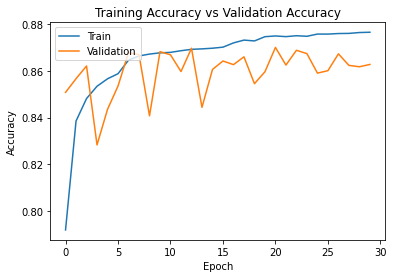

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
import tensorflow as tf
try:
    import tensorflow.python.keras as keras
except:
    import tensorflow.keras as keras
from tensorflow.python.keras import layers
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import struct
import random
import os
from pathlib import Path
import matplotlib.pyplot as plt
import gzip

labels = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'

# your path
# folder = str(os.fspath(Path(__file__).resolve().parent / "data"))
folder = "/content/drive/MyDrive/Handwriting.Keyboard/data"

def load_data(path):
    print("Getting data..")
    with gzip.open(path, 'rb') as f:
        z,dtype,dim = struct.unpack(">HBB",f.read(4))
        shape = tuple(struct.unpack(">I",f.read(4))[0] for d in range(dim))
        print(shape)
        return np.frombuffer(f.read(),dtype=np.uint8).reshape(shape)

def load_emnist():
    train_img = folder +'/emnist-byclass-train-images-idx3-ubyte.gz'
    train_lab = folder +'/emnist-byclass-train-labels-idx1-ubyte.gz'
    test_img = folder +'/emnist-byclass-test-images-idx3-ubyte.gz'
    test_lab = folder +'/emnist-byclass-test-labels-idx1-ubyte.gz'

    train_x = load_data(train_img)
    train_y = load_data(train_lab)
    test_x = load_data(test_img)
    test_y = load_data(test_lab)
    return train_x, train_y, test_x, test_y

train_x, train_y, test_x, test_y = load_emnist()

train_x = train_x.reshape(train_x.shape[0], 28, 28, 1).astype('float32')
test_x = test_x.reshape(test_x.shape[0], 28, 28, 1).astype('float32')

train_x = train_x / 255 # 归一化
test_x = test_x / 255

y_trainOnehot = to_categorical(train_y)
y_testOnehot = to_categorical(test_y)

train_x, X_val, train_y, Y_val = train_test_split(train_x, y_trainOnehot, test_size = 0.1, random_state=2)

model = Sequential()
# 构建网络


# 设置CNN模型
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu', input_shape = (28,28,1)))
model.add(BatchNormalization())

model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation = 'relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters = 64, kernel_size = (5,5), padding = 'Same', activation = 'relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 128, kernel_size = 4, activation = 'relu'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(len(labels), activation = "softmax"))




model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

# 设置一个学习率衰减
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
# 增加数据以防止过拟合
datagen = ImageDataGenerator(
        featurewise_center=False,  				# 在数据集上将输入平均值设置为0
        samplewise_center=False,  				# 将每个样本的平均值设置为0
        featurewise_std_normalization=False,    # 将输入除以数据集的std
        samplewise_std_normalization=False,  	# 将每个输入除以它的std
        zca_whitening=False,  					# 使用ZCA白化
        rotation_range=10,  					# 在范围内随机旋转图像（0到180度）
        zoom_range = 0.1, 						# 随机缩放图像
        width_shift_range=0.1,  				# 水平随机移动图像（总宽度的一部分）
        height_shift_range=0.1,  				# 垂直随机移动图像（总高度的一部分）
        horizontal_flip=False,  				# 随机翻转图像
        vertical_flip=False)  					# 随机翻转图像


datagen.fit(train_x)

# 拟合模型
history = model.fit(datagen.flow(train_x, train_y, batch_size=128),
                              epochs = 30, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=train_x.shape[0] // 128)
                              # ,callbacks=[learning_rate_reduction])

model.save('my_model.h5')
# model.evaluate(X_test4D_Normalize,y_testOnehot)

# classes = model.predict(train_y[55], verbose = 1)

# print(classes[0])
# print(labels[int(classes[0])])
  
# plt.imshow(train_y[55].T,cmap = "gray")
# plt.colorbar()
# plt.show()


Getting data..
(697932, 28, 28)
Getting data..
(697932,)
Getting data..
(116323, 28, 28)
Getting data..
(116323,)
Epoch 1/30
4907/4907 - 196s - loss: 0.6527 - accuracy: 0.7893 - val_loss: 0.4536 - val_accuracy: 0.8367 - 196s/epoch - 40ms/step
Epoch 2/30
4907/4907 - 192s - loss: 0.4632 - accuracy: 0.8378 - val_loss: 0.3776 - val_accuracy: 0.8613 - 192s/epoch - 39ms/step
Epoch 3/30
4907/4907 - 186s - loss: 0.4293 - accuracy: 0.8473 - val_loss: 0.3675 - val_accuracy: 0.8655 - 186s/epoch - 38ms/step
Epoch 4/30
4907/4907 - 189s - loss: 0.4076 - accuracy: 0.8531 - val_loss: 0.3864 - val_accuracy: 0.8606 - 189s/epoch - 39ms/step
Epoch 5/30
4907/4907 - 185s - loss: 0.3969 - accuracy: 0.8566 - val_loss: 0.3974 - val_accuracy: 0.8579 - 185s/epoch - 38ms/step
Epoch 6/30
4907/4907 - 186s - loss: 0.3892 - accuracy: 0.8580 - val_loss: 0.3920 - val_accuracy: 0.8553 - 186s/epoch - 38ms/step
Epoch 7/30
4907/4907 - 185s - loss: 0.3830 - accuracy: 0.8600 - val_loss: 0.3789 - val_accuracy: 0.8614 - 185s/e

NameError: ignored

不加学习率衰减

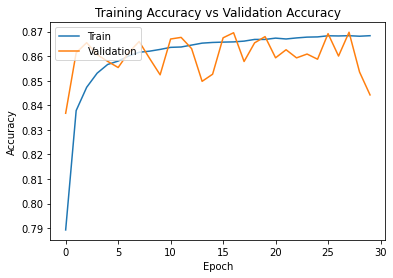

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

在数据集中随机选一图片进行验证

Getting data..
(116323, 28, 28)


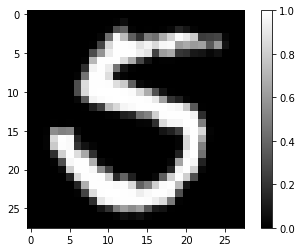

1/1 [==============================] - 0s 269ms/step
5
5


In [ ]:
import numpy as np
import pandas as pd
import struct
import random
import os
import tensorflow as tf
from tensorflow import keras
from pathlib import Path
import matplotlib.pyplot as plt
import gzip
from tensorflow.keras import models
labels = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'


model = models.load_model("my_model.h5")
folder = "data"
def load_data(path):
    print("Getting data..")
    with gzip.open(path, 'rb') as f:
        z,dtype,dim = struct.unpack(">HBB",f.read(4))
        shape = tuple(struct.unpack(">I",f.read(4))[0] for d in range(dim))
        print(shape)
        return np.frombuffer(f.read(),dtype=np.uint8).reshape(shape)


test_img = folder +'/emnist-byclass-test-images-idx3-ubyte.gz'
test_x = load_data(test_img)

test_x = test_x/255.0

num = random.randint(0,len(test_x))
# print(None,test_x[55])

plt.imshow(test_x[num].T,cmap = "gray")
plt.colorbar()
plt.show()

classes = model.predict(np.array([test_x[num]]))
temp = np.round(classes)
print(int(list(np.where(temp==1))[1]))
print(labels[int(list(np.where(temp==1))[1])])
  

    